In [1]:
import pandas as pd

df = pd.read_csv("Pima_Indians_Diabetes_Database.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature = df[df.keys().drop('Outcome')]
outcome = df['Outcome']

In [4]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_target, test_target = train_test_split(feature, outcome, stratify=outcome, random_state=42)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_feature_pca = pca.fit_transform(train_feature)
test_feature_pca = pca.transform(test_feature)

In [6]:
pca.explained_variance_ratio_

array([0.87790022, 0.06818406])

In [7]:
pca.explained_variance_ratio_[0]

0.8779002196127962

In [8]:
pca.explained_variance_ratio_[1]

0.06818405786880681

In [9]:
keys = sorted(outcome.unique())

In [10]:
keys

[0, 1]

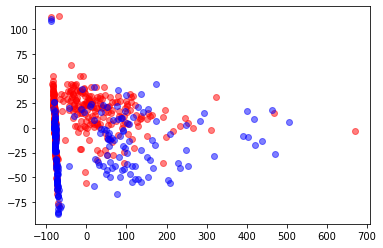

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

color = ["red","blue"]

for k in keys:
    selected_item_feature = train_feature_pca[train_target==k]
    plt.scatter(selected_item_feature[:,0],selected_item_feature[:,1], c=color[k], alpha=0.5)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_feature_pca_scaled = scaler.fit_transform(train_feature_pca)
test_feature_pca_scaled = scaler.transform(test_feature_pca)

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_feature_pca_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = clf.predict(test_feature_pca_scaled)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.6197916666666666
[[29 38]
 [35 90]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_jobs=-1, random_state=42)
clf2.fit(train_feature_pca_scaled, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [17]:
y_pred = clf2.predict(test_feature_pca_scaled)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.6822916666666666
[[ 31  36]
 [ 25 100]]


In [19]:
from sklearn.svm import SVC

clf3 = SVC(random_state=42)
clf3.fit(train_feature_pca_scaled, train_target)

SVC(random_state=42)

In [20]:
y_pred = clf3.predict(test_feature_pca_scaled)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.703125
[[ 25  42]
 [ 15 110]]


In [22]:
from xgboost import XGBClassifier

clf4 = XGBClassifier()
clf4.fit(train_feature_pca_scaled, train_target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [23]:
y_pred = clf4.predict(test_feature_pca_scaled)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.6666666666666666
[[31 36]
 [28 97]]
